# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [5]:
# Your code here. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

In [2]:

x_values = [17,51,27,21,36,48,19,26,54,30]
y_values = [10,1,5,9,4,2,9,6,0,3]
student_data = pd.DataFrame()
student_data['X']=x_values
student_data['Y']=y_values

Draw a dispersion diagram (scatter plot) for the data.

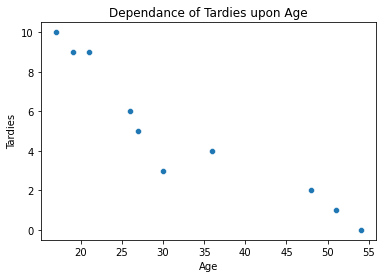

In [6]:
# Your code here.
sns.scatterplot('X','Y', data=student_data)
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Dependance of Tardies upon Age')
plt.show()


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

##### Respuesta: 
Cuanta más edad tiene alguien, menos tardanzas tiene

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [7]:
# Your response here.
print(f'Correlation:{student_data.X.corr(student_data.Y)}, Covariance:{np.cov(student_data.X, student_data.Y)[0][1]}')

Correlation:-0.9391626886887122, Covariance:-45.56666666666667


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
# Your response here.
# Linear regression
m, b, r, p, stderr = ss.linregress(student_data.X, student_data.Y)


In [9]:
# Elements for the function
x_lr = np.linspace(min(student_data.X), max(student_data.X),100)
y_lr = m*x_lr+b


Plot your regression model on your scatter plot.

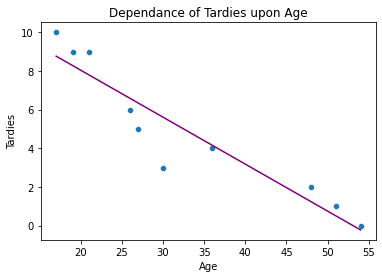

In [10]:
# Your code here.
# plot the values
plt.plot(x_lr,y_lr, c='purple')
sns.scatterplot('X','Y', data=student_data)
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Dependance of Tardies upon Age')
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [11]:
# Your response here. 
#Dado que el valor de R,
#podemos decir que es un buen predictor de la tardanza:
#a medida que uno envejece, la tardanza se reduce.
#Puede ser sobre otra variable oculta, pero hay una fuerte
#correlación.
r

-0.9391626886887123

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [13]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('./vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [14]:
# Your response here. 
vehicles2=vehicles[['CO2 Emission Grams/Mile','Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
vehicles2.corr()[['CO2 Emission Grams/Mile']]

# La variable que más determina las emisiones de CO2 es GuelBrrels,
# luego el costo de Guel, luego el MPG combinado, luego los cilindros no es tan significativo
# y finalmente años es el menor.

,CO2 Emission Grams/Mile
CO2 Emission Grams/Mile,1.000000
Year,-0.222300
Cylinders,0.752393
Fuel Barrels/Year,0.986189
Combined MPG,-0.926229
Fuel Cost/Year,0.930865


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [15]:
# Your response here. 
x_mlr = sm.add_constant(vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']])
y_mlr = vehicles['CO2 Emission Grams/Mile']

ml_regresion = sm.OLS(y_mlr,x_mlr).fit()
# multilinear regression. 

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [47]:
# Your response here. 
ml_regresion.summary()

# La probabilidad del valor niega la hipótesis nula que produce
# un resultado seguro de que los coeficientes de barriles de combustible,
# mpg, y cilindros combinados contribuyen más, sin embargo
#  el año aporta más y finalmente lo hace el combustible / costo.

# Tenemos un valor alto de R cuadrado, lo que significa que podríamos
# han utilizado valores no independientes en la regresión.

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 01 Aug 2019   Prob (F-statistic):               0.00
Time:                             14:24:13   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [16]:
# Your code here. 
x = [1,3,4,6,8,9,11,14]
y = [1,2,3,3,5,7,8,13]

invitations = pd.DataFrame()
invitations['Invited'] = x
invitations['Attended'] = y

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

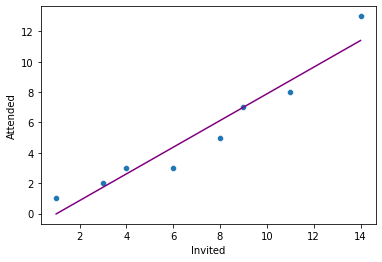

In [17]:
# Your code here.
sns.scatterplot(invitations.Invited,invitations.Attended)
m, b, r, p, stderr = ss.linregress(invitations.Invited, invitations.Attended)
x2 = np.linspace(min(invitations.Invited), max(invitations.Invited))
y2 = m*x2+b
plt.plot(x2,y2,c='purple')

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 
# The more people invited, the more asistants that will
# assist. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. No problematic points.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 
# Nothing changed because there were no problematic points. 